In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [ ]:
df = pd.read_csv("1-studyhours.csv") 

In [3]:
df 

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7
5,18.0,78.8
6,19.2,77.1
7,22.2,90.8
8,25.2,99.0
9,17.4,84.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


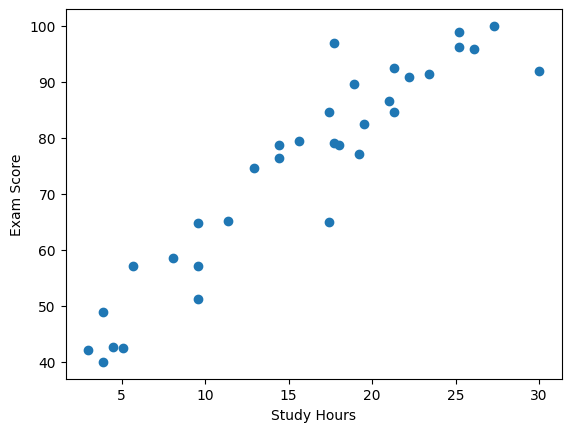

In [5]:
plt.scatter(x = df["Study Hours"], y = df["Exam Score"]) 
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")

plt.show()

In [6]:
# independent and dependent features 
X = df[["Study Hours"]]
y = df["Exam Score"]

In [7]:
type(X)

pandas.core.frame.DataFrame

In [8]:
type(y)

pandas.core.series.Series

In [9]:
# test - train split 

In [10]:
from sklearn.model_selection import train_test_split 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [12]:
y_train

18     64.9
1      57.1
2      42.7
32     89.6
6      77.1
3      65.1
29     82.4
26     64.8
9      84.6
4      78.7
28     79.1
10     92.4
27     79.5
13    100.0
17     74.7
15     97.0
22     76.5
31     96.2
11     95.9
7      90.8
0      40.0
23     42.2
5      78.8
12     92.0
21     58.5
8      99.0
Name: Exam Score, dtype: float64

In [13]:
y_test 

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

In [46]:
# standardize the data set 

In [15]:
from sklearn.preprocessing import StandardScaler 

In [16]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [17]:
# balanced feature values 
# efficient gradient descent 

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # fit -> data leakage 

In [20]:
X_train

array([[ 0.11794385],
       [-0.97424848],
       [-1.68837424],
       [ 0.32798083],
       [ 0.36998823],
       [-0.7222041 ],
       [ 0.41199563],
       [-0.97424848],
       [ 0.11794385],
       [-0.30213013],
       [ 0.15995124],
       [ 0.66404001],
       [-0.13410054],
       [ 1.50418796],
       [-0.51216711],
       [ 0.15995124],
       [-0.30213013],
       [ 1.21013618],
       [ 1.33615837],
       [ 0.7900622 ],
       [-1.77238903],
       [-1.89841122],
       [ 0.20195864],
       [ 1.88225453],
       [-1.18428547],
       [ 1.21013618]])

In [21]:
X_test 

array([[-1.60435944],
       [ 0.62203261],
       [ 0.95809179],
       [-1.52034465],
       [-0.97424848],
       [-1.77238903],
       [ 0.66404001]])

In [22]:
from sklearn.linear_model import LinearRegression 

In [23]:
regression = LinearRegression() 

In [24]:
regression.fit(X_train, y_train) 

LinearRegression()

In [25]:
print("Coefficient: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficient:  [16.17860223]
Intercept:  76.9076923076923


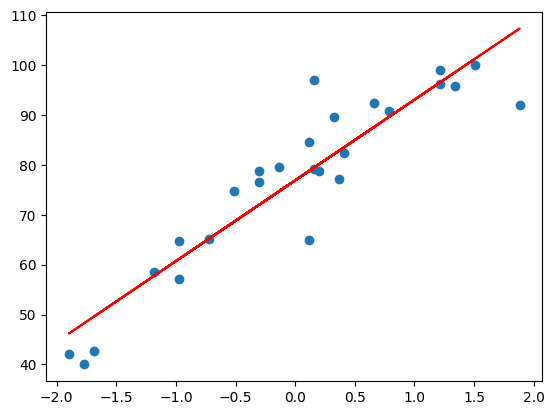

In [26]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color = "r")
plt.show()

In [27]:
# x = 20, y = ? 

In [31]:
regression.predict([[20]])

array([400.47973694])

In [30]:
scaler.transform([[20]])

/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.48200796]])

In [32]:
regression.predict(scaler.transform([[20]]))

/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [33]:
regression.predict(scaler.transform([[25]]))

/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([96.0329235])

In [34]:
regression.predict(scaler.transform([[30]]))

/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([107.3599397])

In [35]:
regression.predict(scaler.transform([[0]]))

/Users/batuhanbasoda/Desktop/CENG/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([39.39784252])

In [36]:
# prediction with test data 

In [39]:
y_pred_test = regression.predict(X_test)

In [40]:
y_test 

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

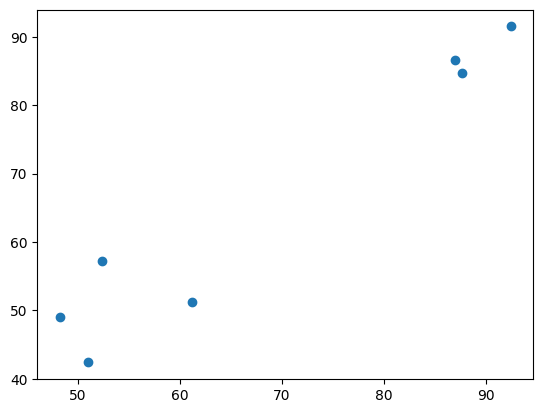

In [41]:
plt.scatter(y_pred_test, y_test)
plt.show()

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [43]:
mse = mean_squared_error(y_test, y_pred_test)
mea = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print("mse: ", mse)
print("mea: ", mea)
print("rmse: ", rmse)

mse:  29.45839048833392
mea:  4.054868128856142
rmse:  5.427558427906043


In [44]:
r2 = r2_score(y_test, y_pred_test)

In [45]:
print("r2 score: ", r2)

r2 score:  0.9196596206825491
